In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
acc = pd.read_csv('AccidentesAviones.csv')

<h3> Descripción de los datos

Estos son los significados de todas las variables, después de haber investigado un poco:
- Fecha
- HORA declarada: Indica la hora del día en que se declaró el accidente. por ejemplo, 1718, indica el accidente se declaró a las 17:18.
- Ruta: Representa la ruta del vuelo involucrado en el accidente. Estos indican los lugares de origen y destino de los vuelos.
- OperadOR: Indica el operador o propietario de la aeronave.
- flight_no: Es el número de vuelo. 
- ac_type: Representa el tipo de aeronave involucrada en el accidente.
- registration: Es el registro o matrícula de la aeronave involucrada en los accidentes.
- cn_ln: Representa el número de construcción y línea de la aeronave que son diferentes identificadores para cada aeronave involucrada.
- all_aboard: Indica el número total de personas a bordo de la aeronave durante el accidente.
- PASAJEROS A BORDO: Indica el número total de pasajeros a bordo de la aeronave
- crew_aboard: Indica el número total de miembros de tripulación a bordo de la aeronave
- cantidad de fallecidos: Indica el número total de fallecidos en el accidente
- passenger_fatalities: Indica el número total de pasajeros fallecidos en el accidente
- crew_fatalities: Indica el número total de miembros de la tripulación fallecidos en el accidente
- ground: Indica el número de personas en tierra que resultaron afectadas por el accidente.
- summary: Contiene un breve resumen del accidente

In [3]:
acc.head(3)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...


In [4]:
#No hay duplicados
acc.duplicated().sum()

0

Elimino la columna "Unnamed", que son los índices de los registros
Y la columna "route", que tiene datos mezclados

In [5]:
acc = acc.drop('Unnamed: 0', axis=1)
acc = acc.drop('route', axis=1)

Reemplazo los valores faltantes ('?') con Nan para manejarlos y contabilizarlos mejor

In [6]:
acc = acc.replace('?', np.nan)

In [7]:
acc.isnull().sum()

fecha                        0
HORA declarada            1504
Ruta                         5
OperadOR                    10
flight_no                 3682
ac_type                     13
registration               272
cn_ln                      667
all_aboard                  17
PASAJEROS A BORDO          221
crew_aboard                219
cantidad de fallecidos       8
passenger_fatalities       235
crew_fatalities            235
ground                      44
summary                     59
dtype: int64

Más del 70% de los valores de la columna "flight_no" son nulos, por eso, la elimino

In [8]:
acc = acc.drop('flight_no', axis=1)

Convierto los valores de fecha y hora, en objetos datetime

In [9]:
#Reemplazo los valores nulos por 0000
acc['HORA declarada'] = acc['HORA declarada'].replace(np.nan, '0000')
acc['HORA declarada'] = acc['HORA declarada'].str.replace(':', '')

In [10]:
#Existen valores anómalos que hay que corregir para poder hacer la conversión
for valor in acc['HORA declarada'].unique():
    if len(valor) != 4:
        print(valor)

c 1800
c 0230
c 1200
c 1315
c 1100
c 915
c 1000
c 1700
c1700
c 1545
c 200
c 1600
c 0800
c0900
c 1300
c 2040
c 2300
c 0900
c 2035
c 1500
c 1115
c 0100
06;15
c 0200
c 0330
c 2015
c 1030
0209Z
c 2000
c 1340
0350Z
c 1130
c 0250
c 1145
1734Z
000
0100Z
c 0630
900
102
135
007
245
c 0700
175
113
0500Z


In [11]:
acc['HORA declarada'] = acc['HORA declarada'].str.replace('c ', '')
acc['HORA declarada'] = acc['HORA declarada'].str.replace('c', '')
acc['HORA declarada'] = acc['HORA declarada'].str.replace(';', '')
acc['HORA declarada'] = acc['HORA declarada'].str.replace('Z', '')


#Existen valores compuestos solo por 3 caracteres,
#estos los reemplazo por 0000, ya que la información no es clara
for valor in acc['HORA declarada'].values:
    if len(valor) != 4:
        indices = acc.index[acc['HORA declarada'] == valor]
        acc['HORA declarada'][indices] = '0000'


Reemplazo los nombres de las columnas para un mejor manejo

In [12]:
acc = acc.rename(columns={'fecha': 'date','HORA declarada': 'time', 'Ruta': 'route', 'OperadOR':'operator', 'cn_ln':'model', 'PASAJEROS A BORDO':'passengers_onboard', 'cantidad de fallecidos':'fatalities_total'})

Convierto los valores de tiempo a formato tiempo

In [13]:
acc['time'] = pd.to_datetime(acc['time'], format='%H%M').dt.time
acc['date'] = pd.to_datetime(acc['date'], format='%B %d, %Y')

Gestiono los valores nulos y coloco a cada columna su tipo de dato correspondiente


<hr>
<h4> ***Importante:*** 
Existen valores numéricos que son 0 que indican, por ejemplo, que no hubo pasajeros fallecidos, por eso rellenaré los valores nulos con -1, para no generar ninguna confusión ni datos falsos
<hr>

In [14]:
#Reemplazo los nulos por -1
acc['all_aboard'] = acc['all_aboard'].replace(np.nan, '-1')
acc['passengers_onboard'] = acc['passengers_onboard'].replace(np.nan, '-1')
acc['crew_aboard'] = acc['crew_aboard'].replace(np.nan, '-1')
acc['fatalities_total'] = acc['fatalities_total'].replace(np.nan, '-1')
acc['passenger_fatalities'] = acc['passenger_fatalities'].replace(np.nan, '-1')
acc['crew_fatalities'] = acc['crew_fatalities'].replace(np.nan, '-1')
acc['ground'] = acc['ground'].replace(np.nan, '-1')

In [15]:
#Coloco el tipo de dato
acc['all_aboard'] = acc['all_aboard'].astype('int')
acc['passengers_onboard'] = acc['passengers_onboard'].astype('int')
acc['crew_aboard'] = acc['crew_aboard'].astype('int')
acc['fatalities_total'] = acc['fatalities_total'].astype('int')
acc['passenger_fatalities'] = acc['passenger_fatalities'].astype('int')
acc['crew_fatalities'] = acc['crew_fatalities'].astype('int')
acc['ground'] = acc['ground'].astype('int')

Añado una nueva columna calculando el número de sobrevivientes

In [16]:
acc['survivors'] = acc['all_aboard'] - acc['fatalities_total']

Reemplazo los valores nulos de tipo texto

In [17]:
for columna in acc.columns.values:
    if acc[columna].dtype == 'object':
        acc[columna] = acc[columna].fillna('No Data')

In [18]:
#convierto los valores de "operator" a mayúsculas para evitar duplicados
acc['operator'] = acc['operator'].str.upper()

In [19]:
sns.set()

<h2> Accidentes

<h3> Accidentes por año, mes y día

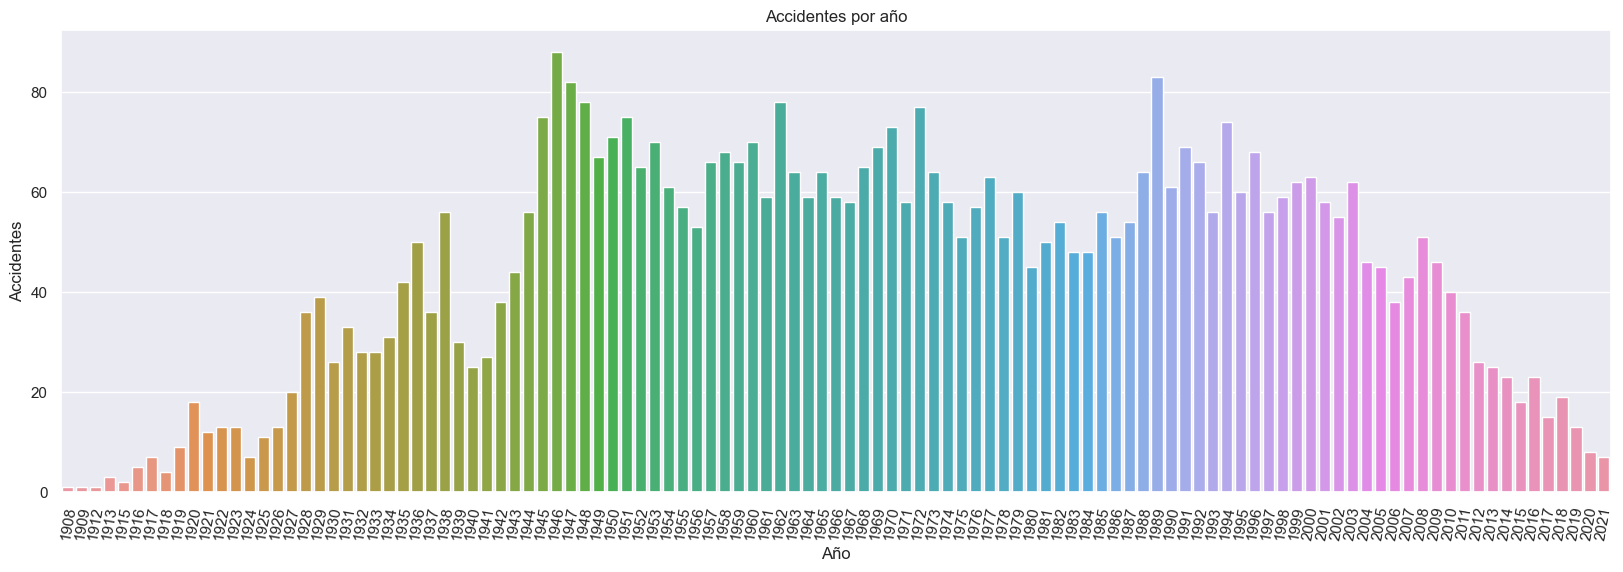

In [20]:
acc_anio = acc.groupby([acc['date'].dt.year]).size() 
anio = acc_anio.index
accidentes = acc_anio.values

fig,ax = plt.subplots(figsize=(20,6))
sns.barplot(x = anio , y = acc_anio)
plt.title('Accidentes por año')
plt.xlabel('Año')
plt.ylabel('Accidentes')
ticks = plt.setp(ax.get_xticklabels(),rotation=80)

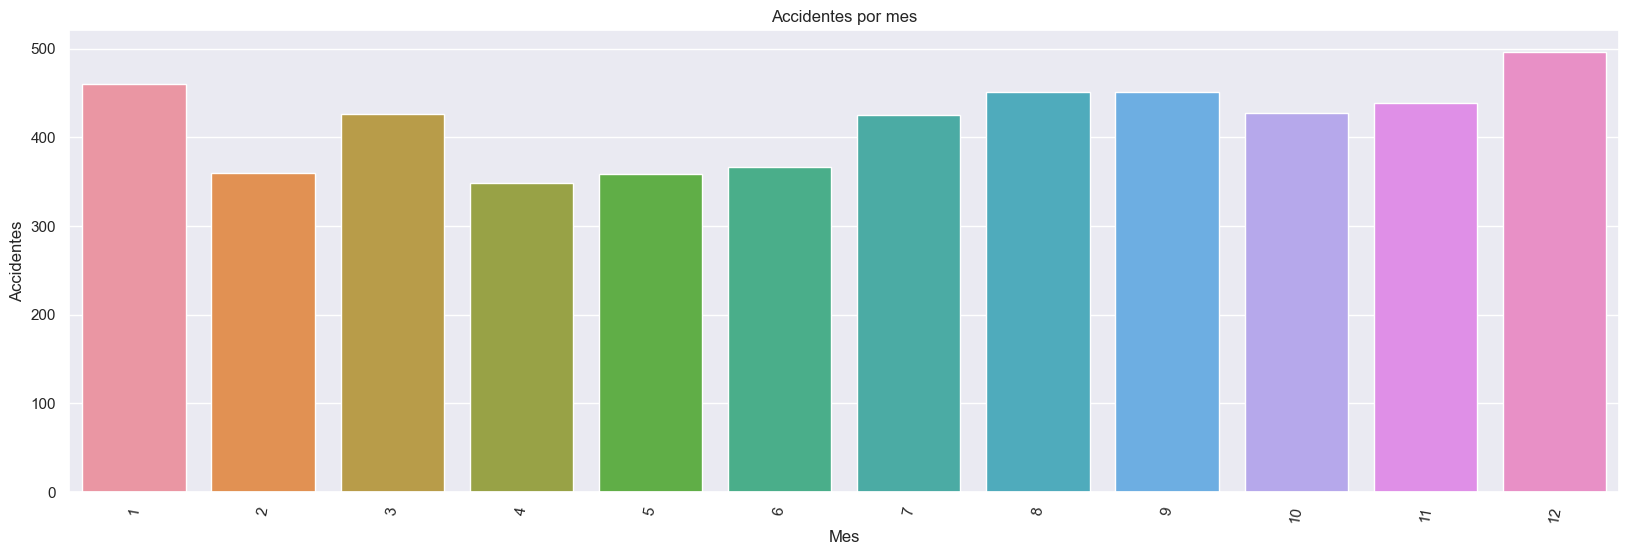

In [21]:
acc_mes = acc.groupby([acc['date'].dt.month]).size() 
mes = acc_mes.index
accidentes = acc_mes.values

fig,ax = plt.subplots(figsize=(20,6))
sns.barplot(x = mes , y = acc_mes)
plt.title('Accidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Accidentes')
ticks = plt.setp(ax.get_xticklabels(),rotation=80)

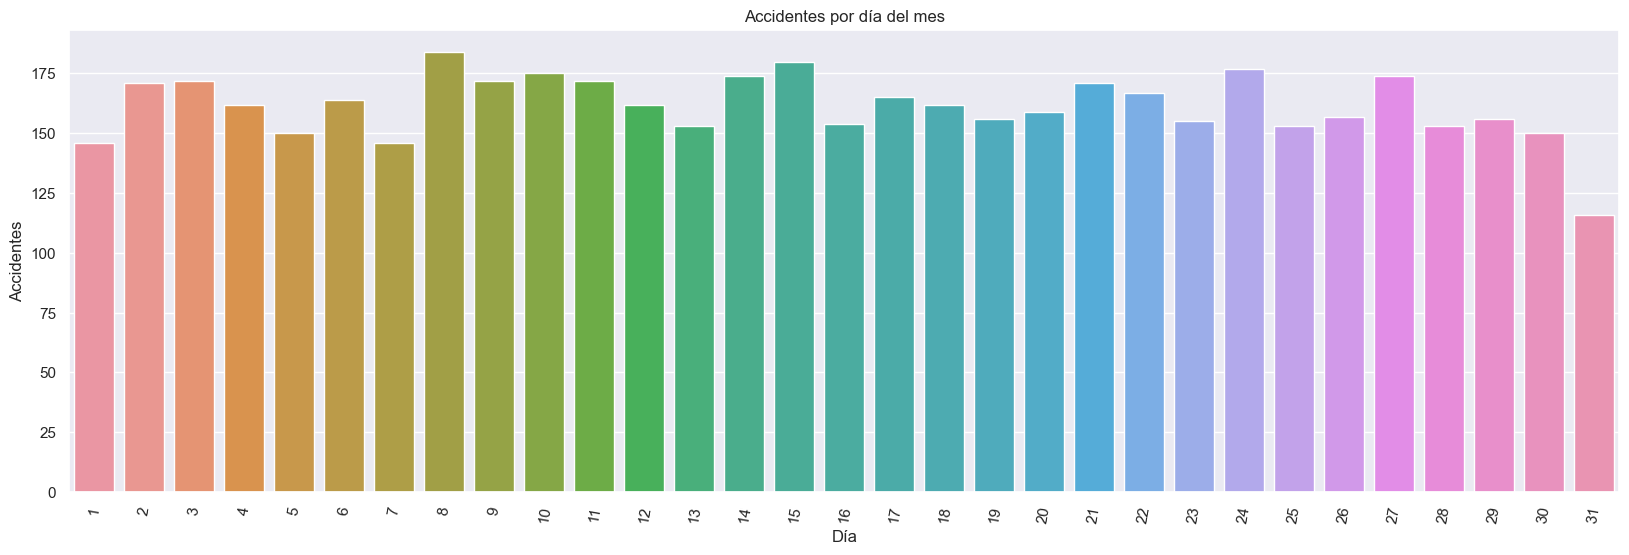

In [22]:
acc_dia = acc.groupby([acc['date'].dt.day]).size() 
dia = acc_dia.index
accidentes = acc_mes.values

fig,ax = plt.subplots(figsize=(20,6))
sns.barplot(x = dia , y = acc_dia)
plt.title('Accidentes por día del mes')
plt.xlabel('Día')
plt.ylabel('Accidentes')
ticks = plt.setp(ax.get_xticklabels(),rotation=80)

In [23]:
acc['military'] = np.where(acc['operator'].str.contains('MILITARY'), 'Militar', 'No militar')

<h3> Accidentes por tipo de aeronave

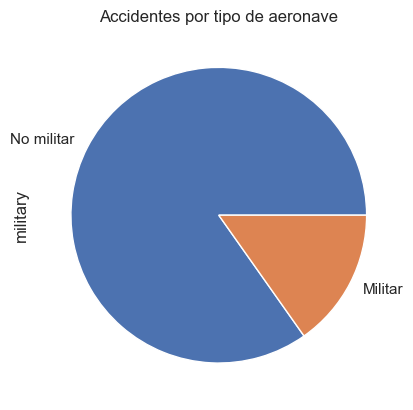

In [24]:
acc['military'].value_counts().plot(kind='pie')

# Personalizar el gráfico
plt.title('Accidentes por tipo de aeronave')
plt.show()

<h3> Número de accidentes por operador

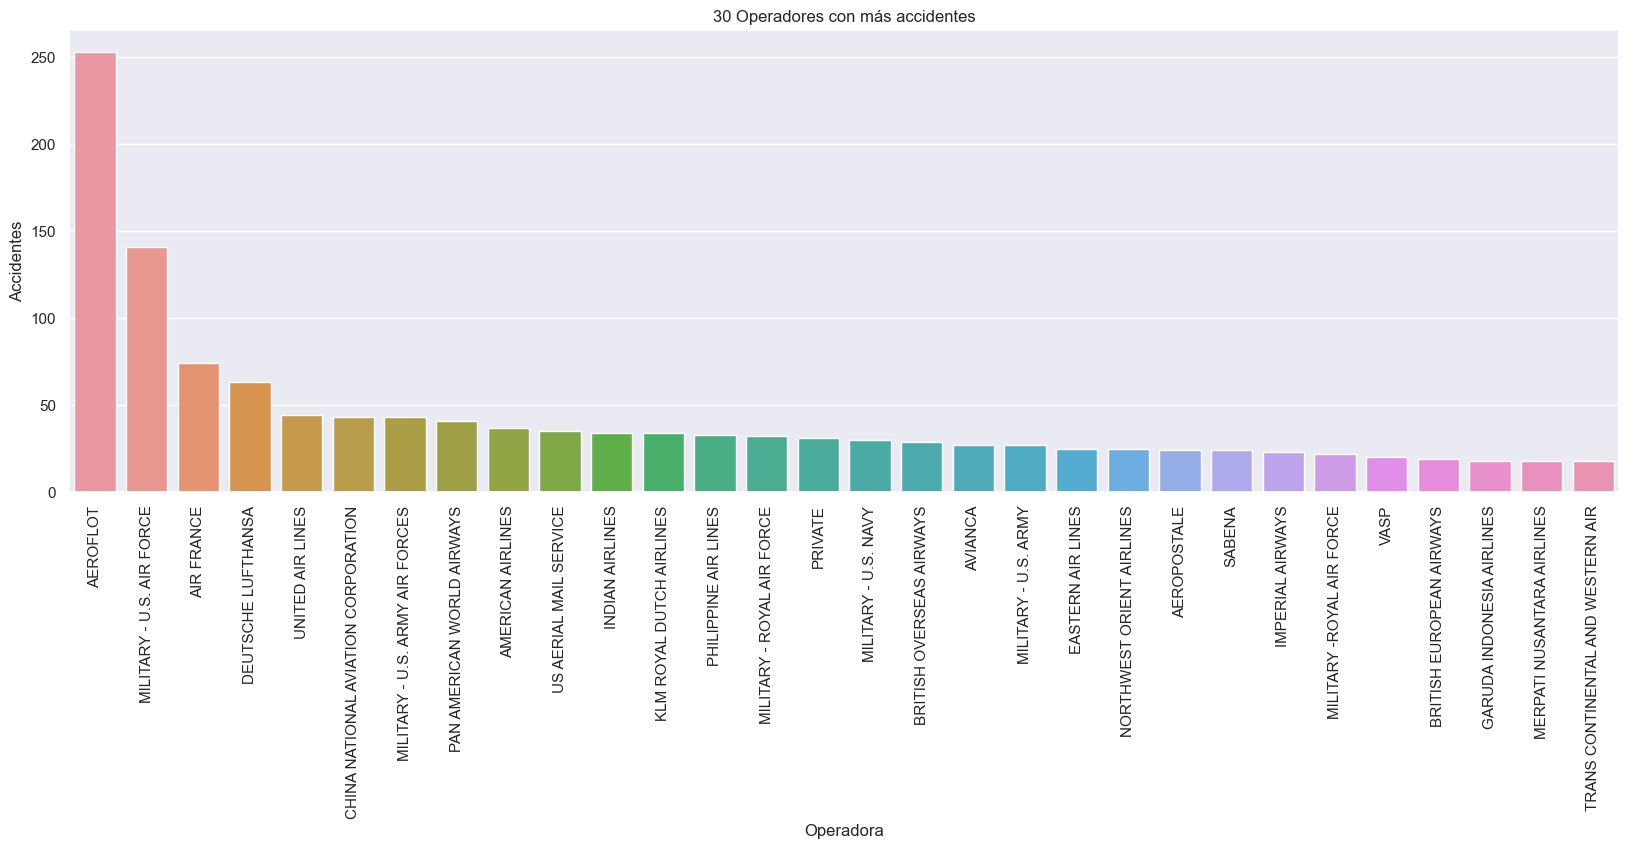

In [25]:
acc_operador = acc.groupby(['operator']).size().nlargest(30)
operadores = acc_operador.index
accidentes = acc_operador.values

fig,ax = plt.subplots(figsize=(20,6))
sns.barplot(x = operadores , y = accidentes)
plt.title('30 Operadores con más accidentes')
plt.xlabel('Operadora')
plt.ylabel('Accidentes')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

<h3> Accidentes por aeronave

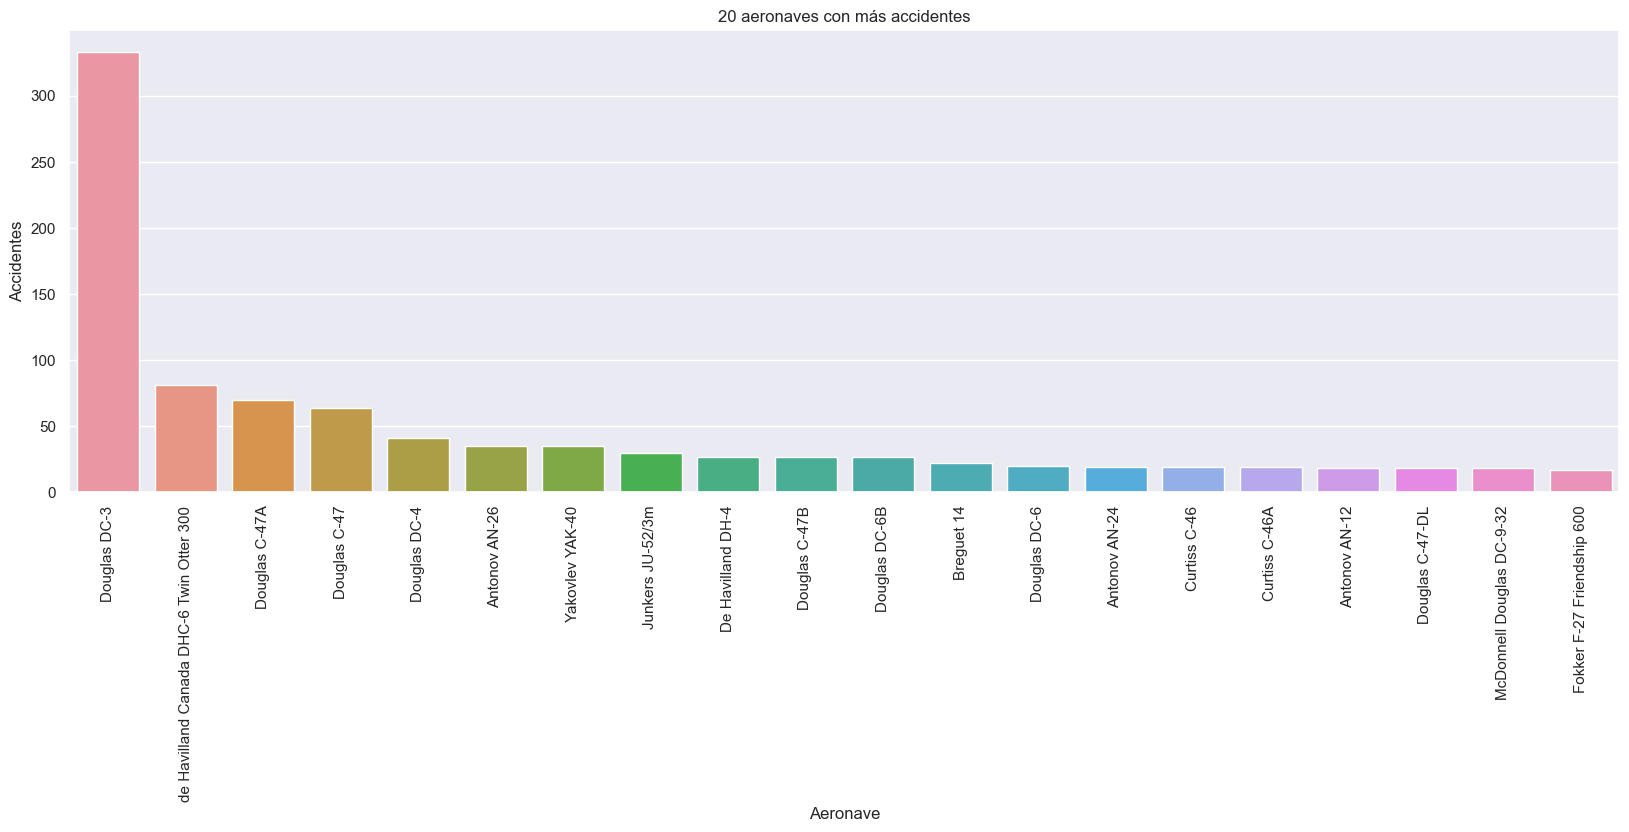

In [27]:
acc_aeronave = acc.groupby(['ac_type']).size().nlargest(20)
aeronaves = acc_aeronave.index
accidentes = acc_aeronave.values

fig,ax = plt.subplots(figsize=(20,6))
sns.barplot(x = aeronaves , y = accidentes)
plt.title('20 aeronaves con más accidentes')
plt.xlabel('Aeronave')
plt.ylabel('Accidentes')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [28]:
acc.head(3)

,date,time,route,operator,ac_type,registration,model,all_aboard,passengers_onboard,crew_aboard,fatalities_total,passenger_fatalities,crew_fatalities,ground,summary,survivors,military
0,1908-09-17,17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,Wright Flyer III,No Data,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1,Militar
1,1909-09-07,00:00:00,"Juvisy-sur-Orge, France",NO DATA,Wright Byplane,SC1,No Data,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,0,No militar
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",MILITARY - U.S. NAVY,Dirigible,No Data,No Data,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,0,Militar


<h2> Fatalidades

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15336\1257298824.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fatalidades = acc.groupby(acc.date.dt.year).sum()


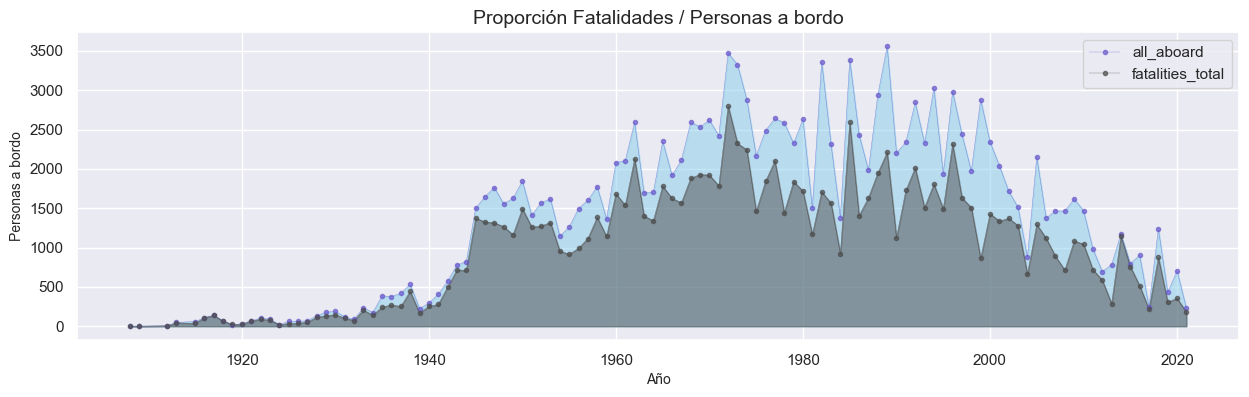

In [29]:
fatalidades = acc.groupby(acc.date.dt.year).sum()
#fatalidades['porcentaje'] = fatalidades['fatalities_total'] / fatalidades['all_aboard']

plt.figure(figsize=(15,4))
plt.fill_between(fatalidades.index, 'all_aboard', data=fatalidades, color="skyblue", alpha=0.5, )
plt.plot(fatalidades.index, 'all_aboard', data=fatalidades, marker = ".", color="Slateblue", alpha=0.7, linewidth=0.3)
plt.fill_between(fatalidades.index, 'fatalities_total', data=fatalidades, color="0.3", alpha=0.5)
plt.plot(fatalidades.index, 'fatalities_total', data=fatalidades, color="0.3", marker = ".", alpha=0.7, linewidth=0.3)
plt.legend(fontsize=10)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Personas a bordo', fontsize=10)
plt.title('Proporción Fatalidades / Personas a bordo', fontsize=14)
plt.legend()


<h3> Sobrevivientes

In [30]:
sobrevivientes = acc.groupby(acc.date.dt.year).sum()
sobrevivientes['porcentaje'] = sobrevivientes['survivors'] / fatalidades['all_aboard']

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15336\2555109363.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sobrevivientes = acc.groupby(acc.date.dt.year).sum()


In [31]:
sobrevivientes

,all_aboard,passengers_onboard,crew_aboard,fatalities_total,passenger_fatalities,crew_fatalities,ground,survivors,porcentaje
date,,,,,,,,,
1908,2,1,1,1,1,0,0,1,0.500000
1909,1,0,1,1,0,0,0,0,0.000000
1912,5,0,5,5,0,5,0,0,0.000000
1913,49,-2,-1,43,-2,-1,0,6,0.122449
1915,60,-1,40,36,-1,16,0,24,0.400000
...,...,...,...,...,...,...,...,...,...
2017,245,193,52,214,172,42,35,31,0.126531
2018,1239,1126,113,874,790,84,2,365,0.294592
2019,432,380,52,305,263,42,21,127,0.293981


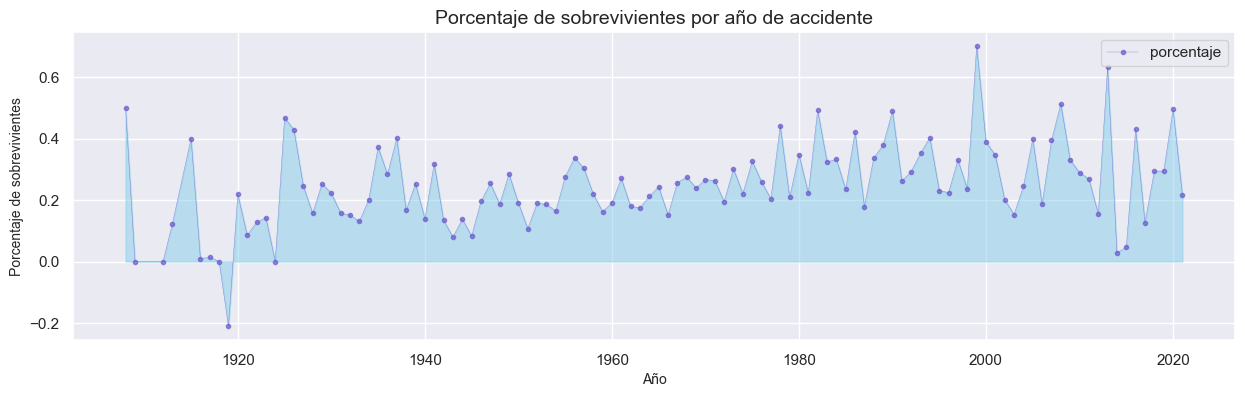

In [32]:
plt.figure(figsize=(15,4))
plt.fill_between(sobrevivientes.index, 'porcentaje', data=sobrevivientes, color="skyblue", alpha=0.5, )
plt.plot(sobrevivientes.index, 'porcentaje', data=sobrevivientes, marker = ".", color="Slateblue", alpha=0.7, linewidth=0.3)
plt.legend(fontsize=10)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Porcentaje de sobrevivientes', fontsize=10)
plt.title('Porcentaje de sobrevivientes por año de accidente', fontsize=14)
plt.legend()


<h3> Importo este dataset del Banco Mundial, donde se ve la cantidad de vuelos comerciales por país a lo largo de los años

El objetivo es calcular la proporción de vuelos/accidentes a través de los años

In [47]:
vuel= pd.read_csv('API_IS.AIR.DPRT_DS2_en_csv_v2_5462238.csv', on_bad_lines='skip')
vuel.drop(columns=['Indicator Name', 'Indicator Code', 'Unnamed: 67', '2022'], inplace=True)
vuel = vuel.rename(columns={'Country Name':'country', 'Country Code':'code'})

Creo un nuevo dataframe, donde elimino las columnas no necesarias, y lo transformo adaptándolo al formato del dataframe principal

In [34]:
vuel2 = vuel.copy()
vuel2.drop(columns=['country', 'code'], inplace=True)
vuel2_t = vuel2.T
total_vuelos = vuel2_t.sum(axis=1)
total_vuelos = total_vuelos.to_frame()
total_vuelos.columns = ['total']

Creo un nuevo dataframe, donde calculo el número de accidentes y lo concateno con una columna que muestra la cantidad de vuelos

In [35]:
accidentes = acc.groupby(acc.date.dt.year).count()
concat = pd.concat([accidentes, total_vuelos], axis=1)
concat

,date,time,route,operator,ac_type,registration,model,all_aboard,passengers_onboard,crew_aboard,fatalities_total,passenger_fatalities,crew_fatalities,ground,summary,survivors,military,total
1908,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1909,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1912,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1913,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN
1915,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.032142e+08
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.150972e+08
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.210298e+08
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700151e+08


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


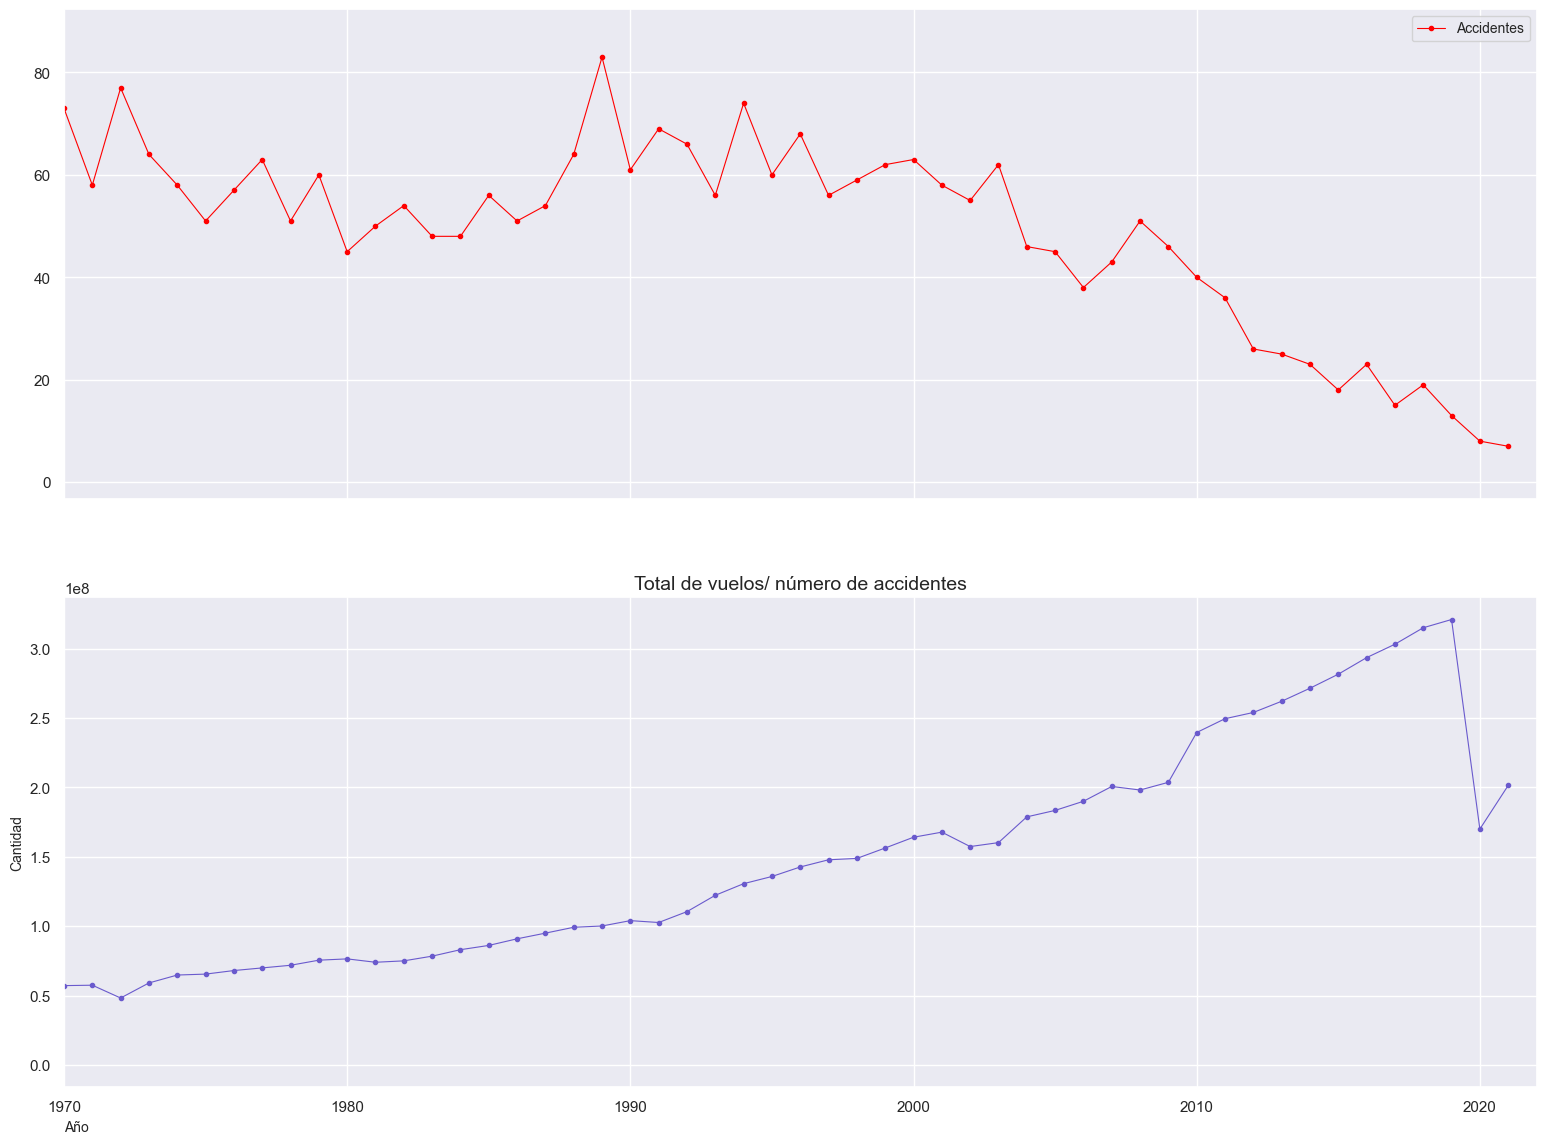

In [36]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(19, 14), sharex=True)

ax1.plot(concat.index, 'route',data=concat, marker = ".", color="red", alpha=1, linewidth=0.8, label='Accidentes')
ax2.plot(concat.index,  'total', data=concat, marker = ".", color="Slateblue", alpha=1, linewidth=0.8, label='Total de vuelos')


ax1.legend(fontsize=10)
plt.xlabel('Año', fontsize=10, loc='left')
plt.xlim(1970,2022)
plt.ylabel('Cantidad', fontsize=10)
plt.title('Total de vuelos/ número de accidentes', fontsize=14)
ax.legend()

In [37]:
acc.head(3)

,date,time,route,operator,ac_type,registration,model,all_aboard,passengers_onboard,crew_aboard,fatalities_total,passenger_fatalities,crew_fatalities,ground,summary,survivors,military
0,1908-09-17,17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,Wright Flyer III,No Data,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1,Militar
1,1909-09-07,00:00:00,"Juvisy-sur-Orge, France",NO DATA,Wright Byplane,SC1,No Data,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,0,No militar
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",MILITARY - U.S. NAVY,Dirigible,No Data,No Data,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,0,Militar


<h3> Extracción de países

Importo la librería Geotext que permitirá extraer los nombres de los países de la columna "route"
y defino una función para hacerlo. Si los valores no coinciden con ningún país, retornará "Ocean"

In [38]:
from geotext import GeoText

def get_country(location):
    places = GeoText(location)
    countries = places.countries
    if len(countries) > 0:
        return countries[0]
    else:
        return 'Ocean'

acc['country'] = acc['route'].apply(get_country)


In [39]:
#Creo una lista con todos los estados que componen los U.S.A.
states_usa = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
    'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
    'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
    'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

Mediante expresiones regulares, compruebo cada valor de la columna "route" y si coincide con el nombre de un estado, en la columna "country" reemplazará el valor erróneo "ocean" por "U.S.A."

In [40]:
import re

re_states = r'\b(?:' + '|'.join(states_usa) + r')\b'
acc['country'] = np.where(acc['route'].str.contains(re_states, flags=re.IGNORECASE, regex=True), 'U.S.A.', acc['country'])


<h4> Transformaciones para Power BI

Dos de los KPIs más importantes para este análisis en concreto son las tasas de mortalidad y supervivencia, por lo que antes de exportar los datos para llevarlos a PowerBI, eliminaré los registros que no contienen información sobre fallecidos o personas a bordo

In [41]:
accBI = acc.copy()
accBI = accBI.drop(accBI[(accBI['all_aboard']<=0)].index)

In [42]:
accBI.head(2)
accBI.drop(columns=['registration', 'summary', 'route'], axis=1, inplace=True)
accBI = accBI.rename(columns={'date':'accidente', 'time':'hora', 'operator':'operador', 'ac_type':'tipo de aeronave', 'model':'modelo',
       'all_aboard':'personas a bordo', 'passengers_onboard':'pasajeros a bordo', 'crew_aboard':'tripulantes a bordo', 'fatalities_total':'total de fallecidos',
       'passenger_fatalities':'pasajeros fallecidos', 'crew_fatalities':'tripulantes fallecidos', 'ground':'afectados en tierra', 'survivors':'sobrevivientes', 'military':'militar', 'country':'país'})

In [43]:
accBI.to_csv('accidentes.csv', index=False)
total_vuelos.to_csv('total_vuelos.csv', index=True)

In [46]:
total_vuelos.tail(1)

,total
2021,2.014455e+08


In [45]:
accBI

,accidente,hora,operador,tipo de aeronave,modelo,personas a bordo,pasajeros a bordo,tripulantes a bordo,total de fallecidos,pasajeros fallecidos,tripulantes fallecidos,afectados en tierra,sobrevivientes,militar,país
0,1908-09-17,17:18:00,MILITARY - U.S. ARMY,Wright Flyer III,1,2,1,1,1,1,0,0,1,Militar,U.S.A.
1,1909-09-07,00:00:00,NO DATA,Wright Byplane,No Data,1,0,1,1,0,0,0,0,No militar,France
2,1912-07-12,06:30:00,MILITARY - U.S. NAVY,Dirigible,No Data,5,0,5,5,0,5,0,0,Militar,U.S.A.
3,1913-08-06,00:00:00,PRIVATE,Curtiss seaplane,No Data,1,0,1,1,0,1,0,0,No militar,Canada
4,1913-09-09,18:30:00,MILITARY - GERMAN NAVY,Zeppelin L-1 (airship),No Data,20,-1,-1,14,-1,-1,0,6,Militar,Ocean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,18:35:00,SOLOY HELICOPTERS,Eurocopter AS350B3 Ecureuil,4598,6,5,1,5,4,1,0,1,No militar,U.S.A.
5004,2021-05-21,18:00:00,MILITARY - NIGERIAN AIR FORCE,Beechcraft B300 King Air 350i,FL-891,11,7,4,11,7,4,0,0,Militar,Nigeria
5005,2021-06-10,08:00:00,MILITARY - MYANMAR AIR FORCE,Beechcraft 1900D,E-325,14,12,2,12,11,1,0,2,Militar,Myanmar
5006,2021-07-04,11:30:00,MILITARY - PHILIPPINE AIR FORCE,Lockheed C-130H Hercules,5125,96,88,8,50,-1,-1,3,46,Militar,Philippines
